# Section One: Defining the Question

### a) Specifying The Data Analytic question

> To predict who is more likely to survive in the Titanic accident 

### b) Defining the Metrics of success

> The successful model should have:
* accuracy score equal to or above 80%
* Recall of 80% and above
* Precision of 80% and above
* F1 score of 80% and above
* AUC curve of 75% and above


### c) Understanding the context

Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 (see Researcher’s Note: Titanic) passengers and ship personnel. The cause of accident was that the ship hit and iceberg that could not bee seen by the ship crew since there was imminent bad weather. At the time of accident the region was frozen and since there were enough life boats, the women and children given first priority and members of the high class. Most of the people died due to drowning and cold temperatures





### d) Recording the Experimental Design

> 1. Reading the data
> 2. Checking the data
> 3. External Data Source Validation
> 4. Tidying the dataset
> 5. Univariate Analysis
> 6. Bivariate Analysis
> 7. Modelling
> 8. Baseline Model
> 9. K- Nearest Neighbours
>10. Optimization of KNN model
>11. KNN-Model 80-20 train(training 80% of the data)
>12. KNN-Model 70-30 train(training 70% of the data)
>13. KNN-Model 60-40 train(training 60% of the data)
>14. Conclusion
>15. Challenging the model


### e) Data Relevance

The data is relevant since it has important columns

Below are the features provided in the Test dataset.
* Passenger Id: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
* The Name of the passenger
* Sex
* Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived


#Section Two: Reading the data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading the dataset
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

# Section Three: Checking the data

In [3]:
# Determining the no. of records in our dataset
#
s = train.shape
print('the train dataset has', s[0], 'number of rows, and ', s[1], 'number of columns' )

y = test.shape
print('the test dataset has', y[0], 'number of rows, and', y[1], 'number of columns')


the train dataset has 891 number of rows, and  12 number of columns
the test dataset has 418 number of rows, and 11 number of columns


In [4]:
#previewing the top of the dataset
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [5]:
#Previewing the bottom of the dataset
print(train.tail())
print(test.tail())

     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]
     PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]


In [6]:
# Checking whether each column's info
#

print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

# Section Four: External Data Source Validation

This dataset is a part of a kaggle competition as shown here:https://www.kaggle.com/c/titanic. Kaggle is a trusted and reliable open source for both datasets and competitions
### a) validation


#  Section Five: Tidying the dataset

### Validity

In [7]:
# Dropping columns with over 60 percent null values
print(train.isnull().sum() / train.shape[0] * 100.00)
print('\n')
print(test.isnull().sum() / test.shape[0] * 100.00 )

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


To have validity in our dataset we will drop cabin variable since in both datasets it has over 60% of missing values

In [8]:
#Dropping the cabin variable from test and train datasets
test = test.drop('Cabin', axis = 1)
train = train.drop('Cabin', axis =1)
#Dropping the name variable from both test and train datasets
test =test.drop('Name', axis=1)
train = train.drop('Name', axis=1)

### Completeness

In [9]:
#Checking for null values
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


Since the missing values are not as many we will replace with mode or mean of the variables.

In [10]:
#Replacing the missing values with the  mode of the columns
#Checking the mode of the age and embarked variable in the train dataset
print(train['Age'].mode())
print(train['Embarked'].mode())
#Checking the mode of the age and fare variable in the test dataset
print(test['Age'].mode())
print(test['Fare'].mode())
#Filling in the variables with the mode in train dataset
train['Age']= train['Age'].fillna(24)
train['Embarked'] = train['Embarked'].fillna('S')
#Filling in the variables with mode in the test dataset
test['Age'] = test['Age'].fillna(21)
test['Fare'] = test['Fare'].fillna(7.75)
print('\n')
print(train.isnull().any())
print('\n')
print(test.isnull().any())

0    24.0
dtype: float64
0    S
dtype: object
0    21.0
1    24.0
dtype: float64
0    7.75
dtype: float64


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


### Consistency

In [11]:
#Checking for duplicated values
print(train.duplicated().any())
print('\n')
print(test.duplicated().any())

False


False


### Uniformity


In [12]:
#checking for data types
print(train.dtypes)
print('\n')
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [13]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

The datasets have the correct data types 

In [14]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in train.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(train[column].nunique())     #Printing the number of unique values in each column
  print(train[column].unique())      # Printing only unique values in each column
  print('\n')  
  

PassengerId
891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 24

In [15]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in test.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(test[column].nunique())     #Printing the number of unique values in each column
  print(test[column].unique())      # Printing only unique values in each column
  print('\n')  

PassengerId
418
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 

### Checking for outliers

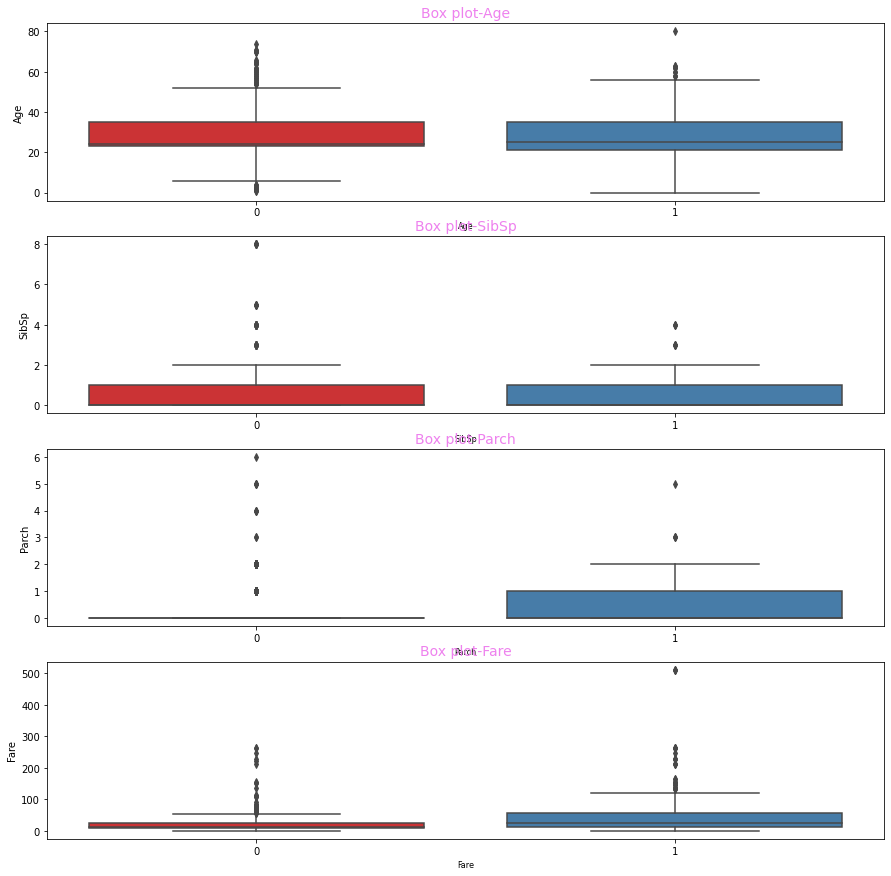

In [16]:
#numerical variables
num_columns = ['Age', 'SibSp', 'Parch', 'Fare']
col_names = num_columns

fig, ax = plt.subplots(len(col_names), figsize = (15, 15))

for i, col_val in enumerate(col_names):

  sns.boxplot(x =train.Survived ,y= train[col_val], ax=ax[i], palette = 'Set1' )
  ax[i].set_title('Box plot-{}'.format(col_val),color = 'violet', fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

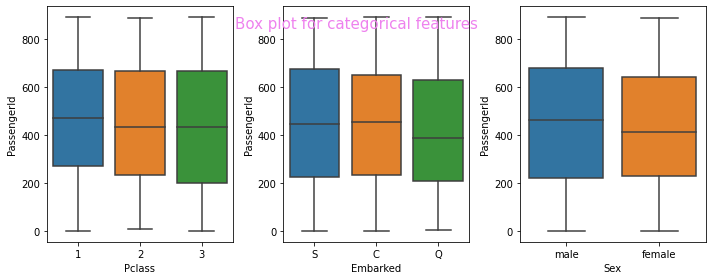

In [17]:
#Checking for outliers in categorical variables
cat_columns = ['Pclass', 'Embarked', 'Sex']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize =(10, 4))
fig.suptitle('Box plot for categorical features', y= 0.93, color = 'violet', fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, cat_columns):
  sns.boxplot(train[name], train.PassengerId, ax = ax)

plt.tight_layout()  # Fitting the subplots to avoid overlappin

There are no outliers in the categorical variables: Pclass, Embarked and Sex variable

# Section Six: Univariate Analysis

### Measures of central tendancy

In [18]:
# using a for loop to find the median value of all the numerical columns
for column in num_columns:
  print('\n')
  print(column +':' + str(train[column].median()))



Age:24.0


SibSp:0.0


Parch:0.0


Fare:14.4542


### Measures of Spread

In [19]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in num_columns:
  print('\n')
  print(column + ', variance: ' +str(train[column].var()))
  print(column + ', std_deviation: ' +str(train[column].std()))
  print(column + ', skewness: ' +str(train[column].skew()))
  print(column + ', kurtosis: ' +str(train[column].kurt()))



Age, variance: 174.42519830010434
Age, std_deviation: 13.207013224045182
Age, skewness: 0.6515085473862433
Age, kurtosis: 0.9266575374838601


SibSp, variance: 1.2160430774662894
SibSp, std_deviation: 1.1027434322934275
SibSp, skewness: 3.6953517271630565
SibSp, kurtosis: 17.880419726645968


Parch, variance: 0.6497282437357467
Parch, std_deviation: 0.8060572211299559
Parch, skewness: 2.7491170471010933
Parch, kurtosis: 9.778125179021648


Fare, variance: 2469.436845743117
Fare, std_deviation: 49.693428597180905
Fare, skewness: 4.787316519674893
Fare, kurtosis: 33.39814088089868


### Analysis of Numerical Variables

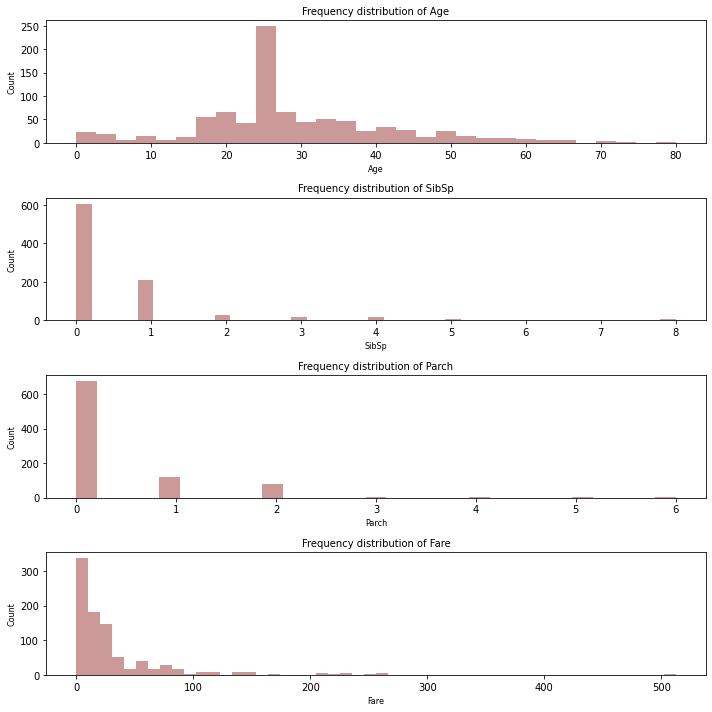

In [20]:
# Plotting distribution of numerical variables
col_names = num_columns
fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):

    sns.distplot(train[col_val], hist=True, ax=ax[i], kde = False, color = 'maroon')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

> Numerical Variables Summaries
* Age variable - Most passangers were of age 24 years in the train dataset
* SibSp - The majority of the passengers didn't travel with siblings and spouses 
* Parch - The majority of the passengers didn't travel with parents and children
* Fare - The most majority of fare tickets were less than 100


### Analysis of Categorical Variables

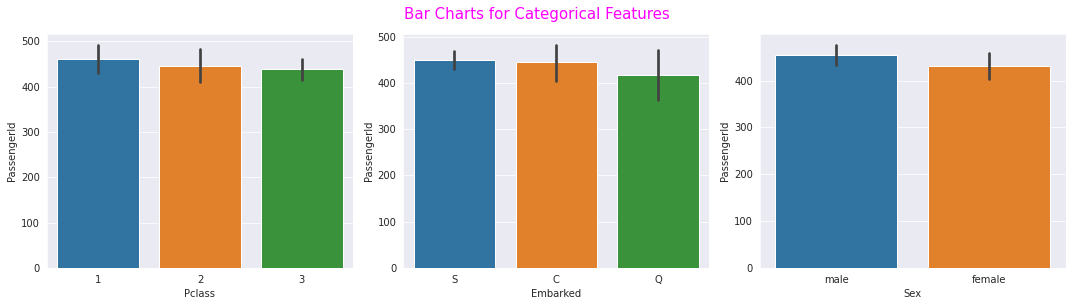

In [21]:
# Bar charts of categorical columns according to the household_size
#
sns.set_style('darkgrid')                                             # Setting the grid style of plots to dark
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 4))     # Ceating four subplots, in two rows and two columns
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, cat_columns):   # Iterating through the subplots
  sns.barplot(train[name], train.PassengerId , ax = ax)                   # Creating a barchart in each subplot
  
plt.tight_layout()  # Fitting the subplots to avoid overlapping

> Analysis of the categorical variables
* Pclass: There were more passengers in Pclass 1 more than Pclass 2. There were more passengers in Pclass 2 more than Pclass 3
* The embarked passengers were more in S more than C .There more in C as compared to Q
* The most sex entries in the train set are the male

#Chapter Seven: Bivariate Analysis

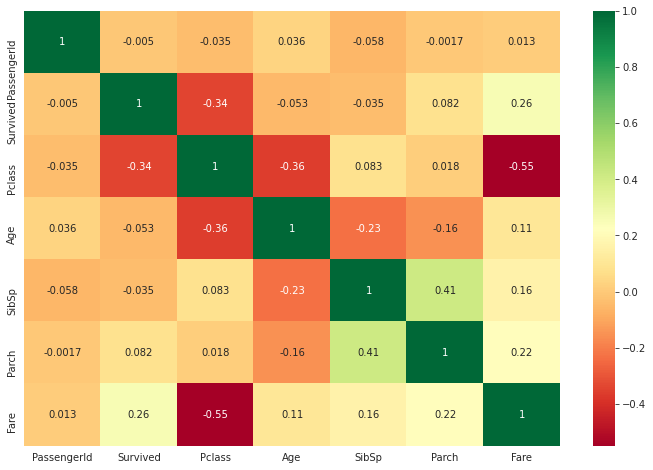

In [22]:
#Checking the correlation of variables using person's correlation
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

<Figure size 480x320 with 0 Axes>

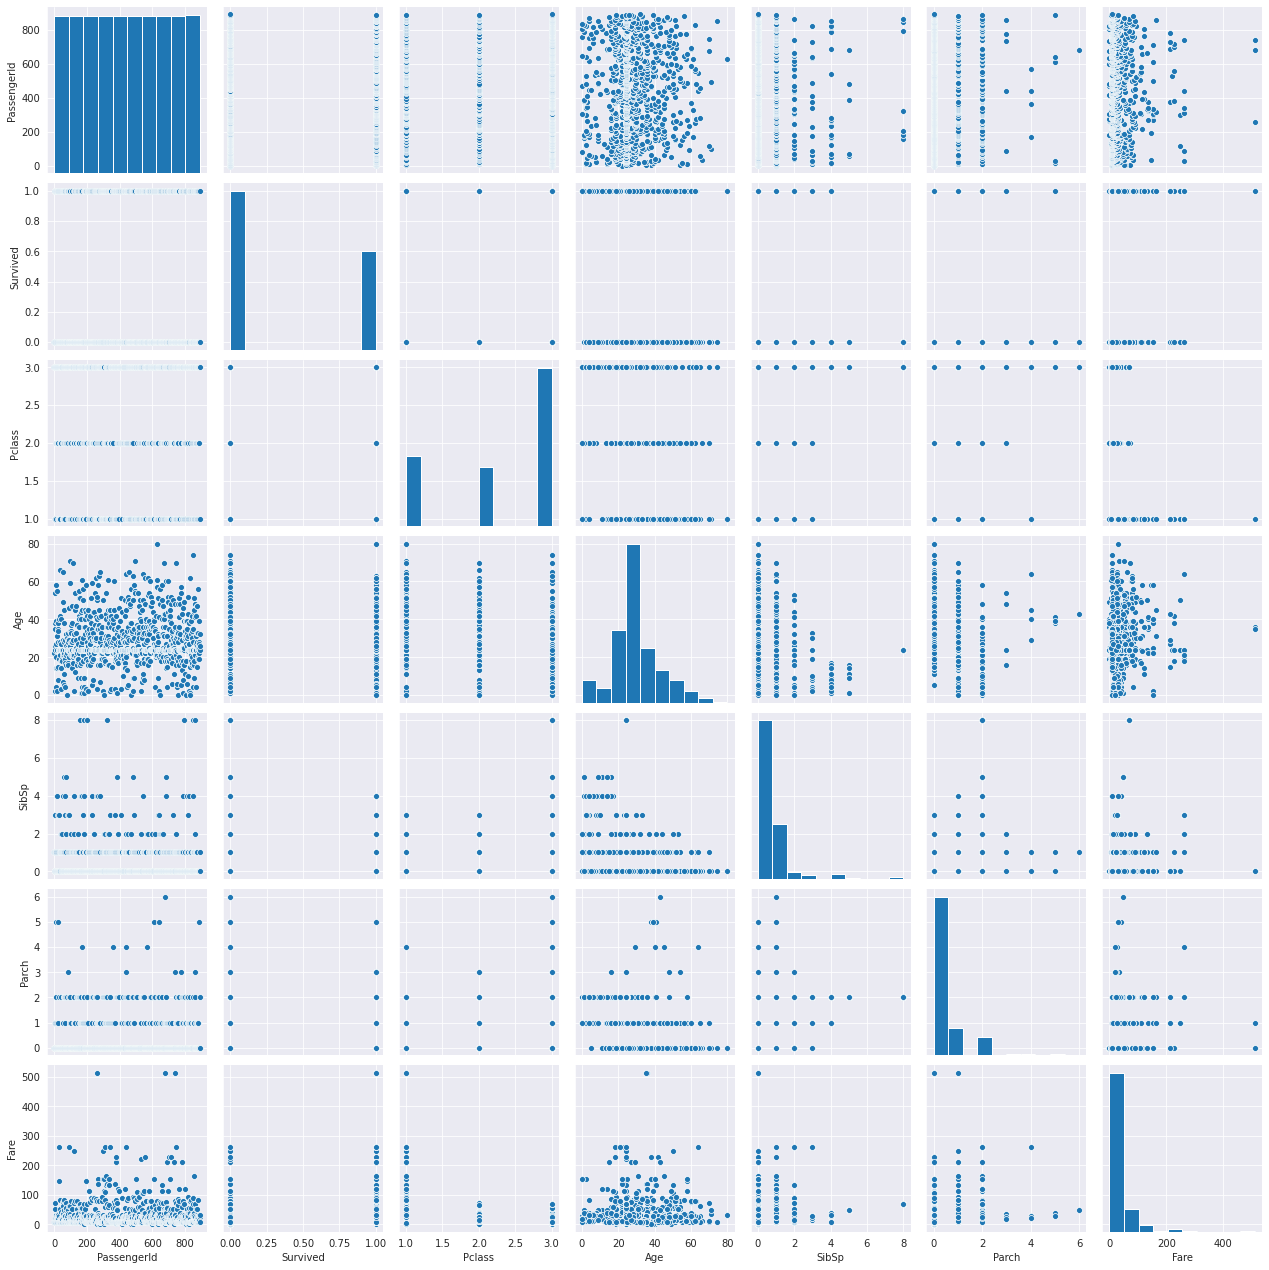

In [23]:
plt.figure(dpi= 80)
sns.pairplot(train[train.columns], kind="scatter")
plt.show()

There is no relationship between passengerid and age as well as fare and age

### Answering EDA Questions


#### Question One: 
How many people survived?

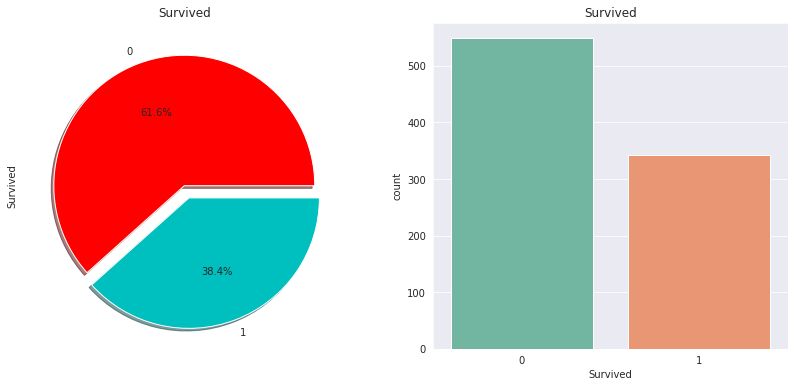

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c']



train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Survived')
plt.subplot(1,2,2)
sns.countplot('Survived',data=train ,palette='Set2')
plt.title('Survived')
plt.show()


About 38.4% people survived from the titanic. This is about 350 people

#### Question Two:
 Which gender consist of those who survived

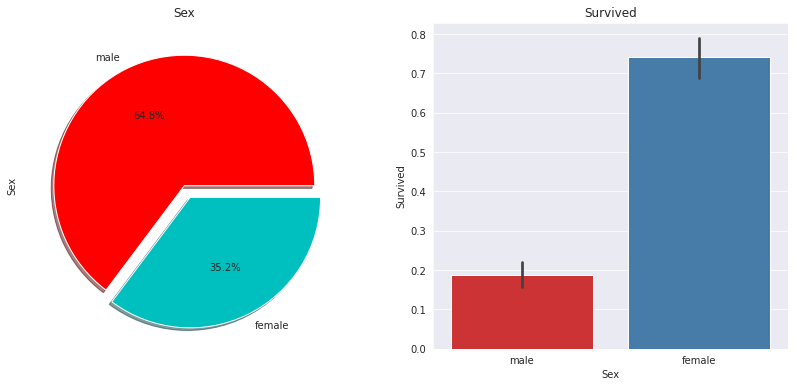

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c']



train['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Sex')
plt.subplot(1,2,2)
sns.barplot(x='Sex', y='Survived',data=train ,palette='Set1')
plt.title('Survived')
plt.show()

The majority sex in the dataset is male while the majority sex that survived was female.

#### Question Three: 
Which Pclass had more survivors

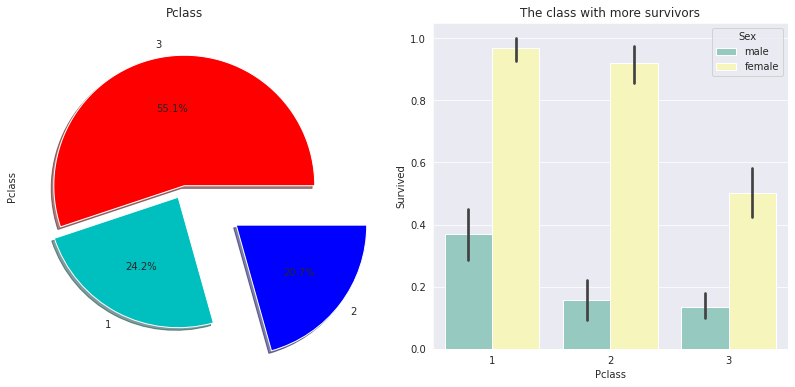

In [26]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c', 'b']



train['Pclass'].value_counts().plot.pie(explode=[0,0.1, 0.5],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Pclass')
plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Survived', hue='Sex',data=train ,palette='Set3')
plt.title('The class with more survivors')
plt.show()

The third class had more passengers about 55.1% of the total population. The first class followed closely by 24.2% and finally the second class with 20.7%.

Most survivors belong to the First class followed by the second class and finally the third class

#### Question Four: 
Which embarked category had more survivors

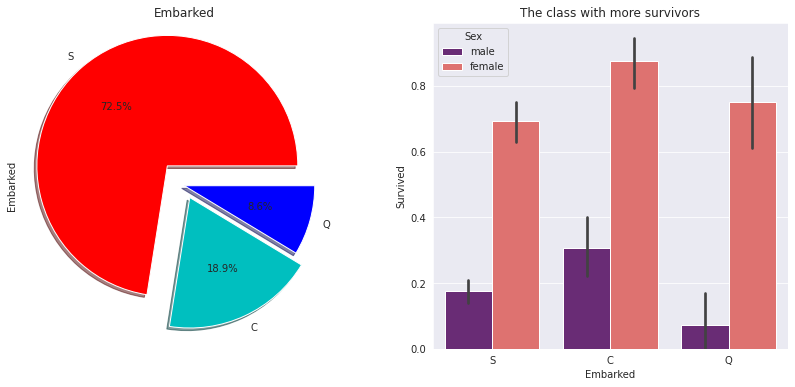

In [27]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c', 'b']



train['Embarked'].value_counts().plot.pie(explode=[0.2,0.1, 0],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Embarked')
plt.subplot(1,2,2)
sns.barplot(x='Embarked', y='Survived', hue='Sex',data=train ,palette='magma')
plt.title('The class with more survivors')
plt.show()

Embarked group S had more passengers followed by C and finally Q. The embarked that had more survivors was C followed by Q and finally S

#### Question Five:
What was the age of the survivors?


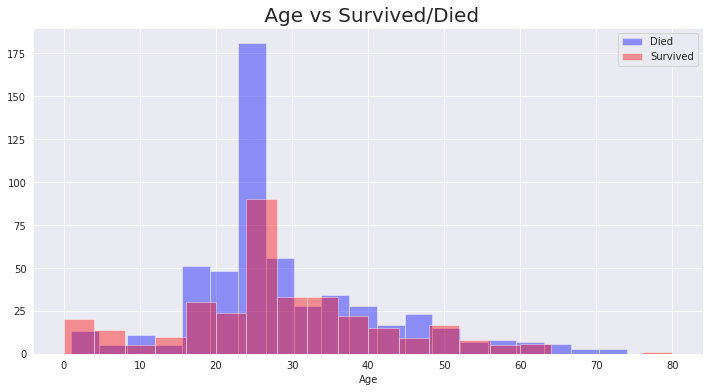

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['Survived']==0].Age,bins=20, kde=False, color='b', label='Died')
sns.distplot(train[train['Survived']==1].Age,bins=20, kde=False, color='r',label='Survived')
plt.title(" Age vs Survived/Died", size=20)
plt.legend()
plt.show()

The most survivors were around 25 years of age. and the most people who died was also about 25 years of age. the youngest survivors were zero years of age and the eldest 80 years of age.

#Chapter Eight: Modelling

### Baseline Model

In [29]:
#We will use Random Forest Classifier
#Encoding values of the train set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
column = ['Sex','Ticket', 'Embarked']

for col in column:
  le.fit(train[col])
  train[col] = le.transform(train[col])


# Selecting the independent variables and the target variable
#
X = train.drop('Survived', axis = 1)
y = train['Survived']

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.8171641791044776


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.77      0.72      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



array([[147,  21],
       [ 28,  72]])

In [30]:
test.PassengerId.shape

(418,)

Random Forest:

Our model has a classification rate of 83% which is an okay baseline model. 

For the precision.In prediction case, when the random forest model predicts a survivor. It predicts one survived 79% of the time. It predicts of no survival 86% of the time.

The recall, the ability for the model to identify a survival rate of 77% and deathrate of 88%.

The F1 score is fairly good with 87% on prediction of those that did not survive and 78% of those that survived

The confusion matrix. The model predicted 147 and 77 of the records accurately and 21, 23 records were not accurately predicted

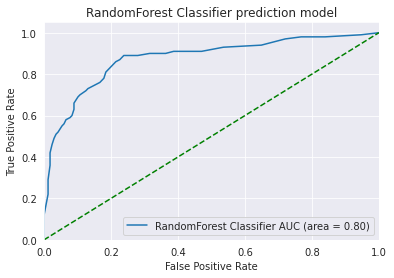

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our ROC area under the curve is 0.82 our model will perform very well

### Feature Selection

In [32]:
#Feature selection
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
Sex,0.2482
Ticket,0.1785
Fare,0.1462
Age,0.1386
PassengerId,0.1372
Pclass,0.0642
SibSp,0.0336
Parch,0.0271
Embarked,0.0264


The randomClassifier is a very good model as seen by the AUC of 82%. Meaning it can make good predictions

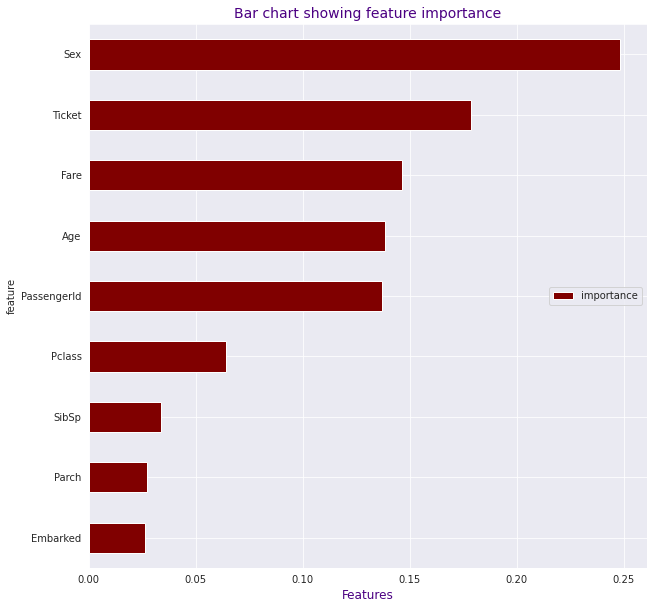

In [33]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'maroon')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

To do the KNN modelling i will pick first five columns which are sex, ticket, age, passengerid and fare.

## K - Nearest Neighbours

Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances.

In [34]:
#Assining test variable x and y
x = train[['Sex', 'Ticket', 'Age', 'PassengerId', 'Fare']]
Y = train['Survived']

#Splitting our data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20)

#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training the model
#using neighbors from 1-20
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21): # diff k values
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores 


[0.7597765363128491,
 0.7541899441340782,
 0.7877094972067039,
 0.776536312849162,
 0.7821229050279329,
 0.7821229050279329,
 0.770949720670391,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.7877094972067039,
 0.7877094972067039,
 0.7821229050279329,
 0.7653631284916201,
 0.776536312849162,
 0.7821229050279329,
 0.770949720670391,
 0.776536312849162,
 0.776536312849162,
 0.7877094972067039]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

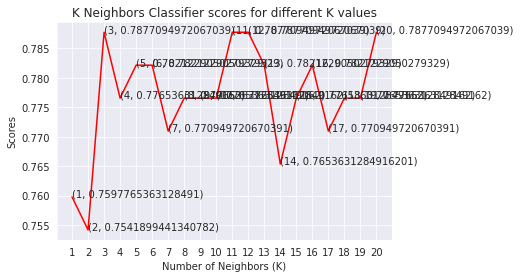

In [35]:
#plotting a line graph of the number of neighbors and the test score achieved in each case

import seaborn as sns

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [36]:
# Model using 5 neighbours 
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
# Making predictions
#
y_pred = knn_classifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7821229050279329


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       117
           1       0.72      0.61      0.66        62

    accuracy                           0.78       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



array([[102,  15],
       [ 24,  38]])

KNN Classifier without Optimization:

Our model has a classification rate of 77% which is an okay baseline model.This is slightly lower than our baseline model 

For the precision.In prediction case, when the KNN model predicts a survivor. It predicts one survived accurately 75%  of the time. It predicts of no survival accurately 78% of the time.

The recall, the ability for the model to identify a survival rate of 63% and deathrate of 86%.

The F1 score is fairly good with 82% on prediction of those that did not survive and 69% of those that survived

The confusion matrix. The model predicted 93 and 45 of the records accurately and 26, 15 records were not accurately predicted

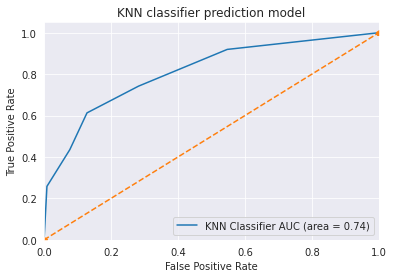

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our ROC area under the curve is 0.75 our model will perform fairly

## Optimization of KNN model

### KNN-Model 80-20 train(training 80% of the data)

In [39]:
#Performing LDA analysis
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [40]:
#using neighbors from 1-20
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21): # diff k values
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores 

[0.6871508379888268,
 0.7318435754189944,
 0.7430167597765364,
 0.770949720670391,
 0.7597765363128491,
 0.7597765363128491,
 0.7597765363128491,
 0.7541899441340782,
 0.776536312849162,
 0.7653631284916201,
 0.7821229050279329,
 0.7877094972067039,
 0.7877094972067039,
 0.7932960893854749,
 0.7988826815642458,
 0.7988826815642458,
 0.7821229050279329,
 0.7877094972067039,
 0.7821229050279329,
 0.7932960893854749]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

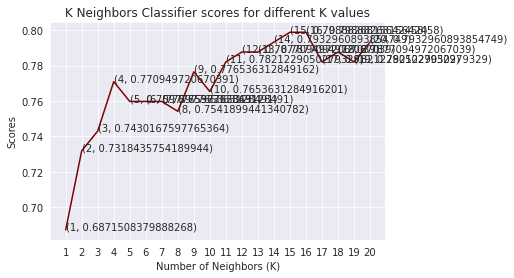

In [41]:
#plotting a line graph of the number of neighbors and the test score achieved in each case

import seaborn as sns

plt.plot([k for k in range(1, 21)], knn_scores, color = 'maroon')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [42]:
# Model using 15 neighbours 
knn_classifier = KNeighborsClassifier(n_neighbors=15)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [43]:
# Making predictions
#
y_pred = knn_classifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7988826815642458


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



array([[94, 16],
       [20, 49]])

KNN (training 80% of the model):

Our model has a classification rate of 79% which is an okay baseline model.Its slightly lower than both the baseline model but better than KNN model without optimization. 

For the precision.In prediction case, when the KNN model predicts a survivor. It predicts one survived accurately 75% of the time. It predicts of no survival accurately 82% of the time.

The recall, the ability for the model to identify a survival rate of 71% and deathrate of 85%.

The F1 score is fairly good with 84% on prediction of those that did not survive and 73% of those that survived

The confusion matrix. The model predicted 94 and 49 of the records accurately and 20, 16 records were not accurately predicted

In [44]:
#Creating a dataframe to output predicted values
Prediction_df_80 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df_80.describe()

,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.363128
std,0.488073,0.482250
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


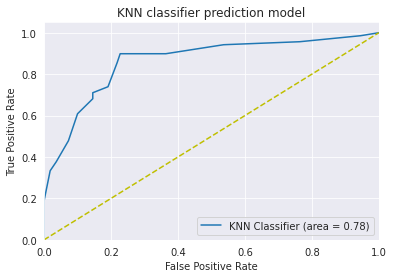

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Our ROC area under the curve is 0.78 our model will perform fairly

### KNN- Model 70-30 train (training 70% of the data)

In [46]:
#Performing LDA analysis
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Performing optimization using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [47]:
#using neighbors from 1-20
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21): # diff k values
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores 

[0.7089552238805971,
 0.7238805970149254,
 0.7425373134328358,
 0.75,
 0.7649253731343284,
 0.7761194029850746,
 0.7649253731343284,
 0.7798507462686567,
 0.7835820895522388,
 0.7686567164179104,
 0.7761194029850746,
 0.7761194029850746,
 0.7723880597014925,
 0.7761194029850746,
 0.7835820895522388,
 0.7798507462686567,
 0.7761194029850746,
 0.7873134328358209,
 0.7798507462686567,
 0.7761194029850746]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

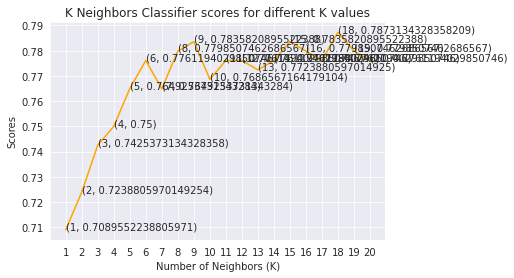

In [48]:
#plotting a line graph of the number of neighbors and the test score achieved in each case

import seaborn as sns

plt.plot([k for k in range(1, 21)], knn_scores, color = 'orange')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [49]:
# Model using 18 neighbours 
knn_classifier = KNeighborsClassifier(n_neighbors=18)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [50]:
# Making predictions
#
y_pred = knn_classifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7873134328358209


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.72      0.70      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



array([[141,  27],
       [ 30,  70]])

KNN (training 70% of the model):

Our model has a classification rate of 78% which is an okay baseline model.Its slightly lower than both the baseline model and KNN with 80%  of the training data. 

For the precision.In prediction case, when the KNN model predicts a survivor. It predicts one survived accurately 72% of the time. It predicts of no survival accurately 82% of the time.

The recall, the ability for the model to identify a survival rate of 70% and deathrate of 84%.

The F1 score is fairly good with 83% on prediction of those that did not survive and 71% of those that survived

The confusion matrix. The model predicted 141 and 70 of the records accurately and 30, 27 records were not accurately predicted

In [51]:
#Creating a dataframe to output predicted values
Prediction_df_70 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df_70.describe()

,Actual,Predicted
count,268.000000,268.000000
mean,0.373134,0.361940
std,0.484542,0.481461
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


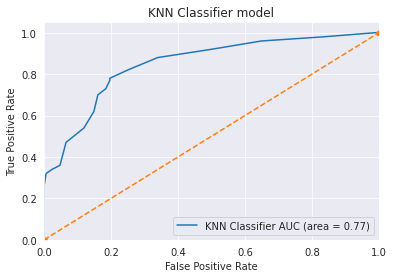

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Our ROC area under the curve is 0.77 our model will perform fairly

### KNN- Model 60-40 train (training 60% of the data)

In [53]:
#Performing LDA analysis
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.4, random_state=0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [54]:
#using neighbors from 1-20
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21): # diff k values
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores 

[0.7226890756302521,
 0.7338935574229691,
 0.7254901960784313,
 0.742296918767507,
 0.7675070028011205,
 0.7591036414565826,
 0.7815126050420168,
 0.7591036414565826,
 0.7759103641456583,
 0.7619047619047619,
 0.7787114845938375,
 0.7647058823529411,
 0.7787114845938375,
 0.7703081232492998,
 0.773109243697479,
 0.7591036414565826,
 0.7591036414565826,
 0.7507002801120448,
 0.7647058823529411,
 0.7535014005602241]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

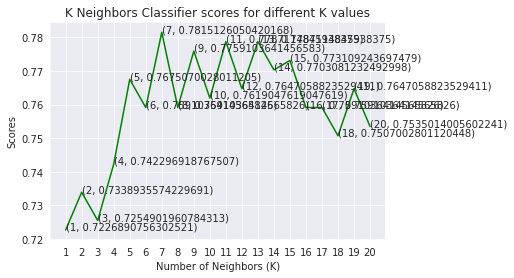

In [55]:
#plotting a line graph of the number of neighbors and the test score achieved in each case

import seaborn as sns

plt.plot([k for k in range(1, 21)], knn_scores, color = 'green')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [56]:
# Model using 7 neighbours 
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [57]:
# Making predictions
#
y_pred = knn_classifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7815126050420168


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       221
           1       0.75      0.65      0.69       136

    accuracy                           0.78       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.78      0.78      0.78       357



array([[191,  30],
       [ 48,  88]])

KNN (training 60% of the model):

Our model has a classification rate of 78% which is an okay baseline model.Its slightly lower than both the baseline model, KNN model without optimization and KNN with 60%  of the training data. 

For the precision.In prediction case, when the KNN model predicts a survivor. It predicts one survived accurately 75% of the time. It predicts of no survival accurately 80% of the time.

The recall, the ability for the model to identify a survival rate of 65% and deathrate of 86%.

The F1 score is fairly good with 83% on prediction of those that did not survive and 69% of those that survived

The confusion matrix. The model predicted 191 and 88 of the records accurately and 30, 48 records were not accurately predicted

In [58]:
#Creating a dataframe to output predicted values
Prediction_df_60 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df_60.describe()

,Actual,Predicted
count,357.000000,357.000000
mean,0.380952,0.330532
std,0.486302,0.471065
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


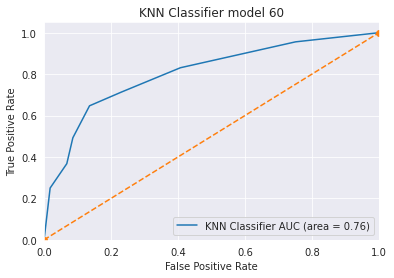

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier model 60')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Our ROC area under the curve is 0.76 our model will perform fairly

# Chapter Nine:Conclusion

From our success criteria above
> The successful model should have:
* accuracy score equal to or above 80%
* Recall of 80% and above
* Precision of 80% and above
* F1 score of 80% and above
* AUC curve of 75% and above


model type | Accuracy Score | Recall(0,1)| Precision(0,1) | F1 (0,1) | AUC curve
-----------|----------------|------------|----------------|----------|--------
RandomForest | 0.83| 0.88, 0.77| 0.86, 0.79 | 0.87, 0.78 | 0.82
KNN without Optimization | 0.77 | 0.78, 0.75 | 0.86, 0.63|0.82, 0.69| 0.75
KNN (80% training)| 0.79 | 0.82, 0.75| 0.85, 0.71| 0.84, 0.73| 0.78
KNN (70% training)|0.78 | 0.82, 0.72| 0.84, 0.70| 0.85, 0.71| 0.77
KNN (60% training)|0.78 | 0.80, 0.75| 0.86, 0.65| 0.83, 0.69|0.76



The Random Forest model meets our successful model criteria. 